In [1]:
import numpy as np

def make_polynomial_dataset(degree=2, n_samples=100, noise=1, low=0, high=20):
    n_features = 1
    p = degree
    np.random.seed(45)
    x = np.random.uniform(low = low, high = high, size = (n_samples, n_features))
    x = x[np.argsort(x[:, 0])]
    y = np.zeros((n_samples, 1))
    
    y = x ** p + np.random.normal(0, noise, size=(n_samples, 1))
    
    return x, y
    

In [2]:
import matplotlib.pyplot as plt

def plot_regression_line(X, y, predictions):
    sorted_idx = np.argsort(X[:, 0], axis=-1)

    plt.plot(X[:, 0], y, 'x', color='blue')
    plt.plot(X[sorted_idx, 0], predictions[sorted_idx, 0], '-', color='red')

In [3]:
# Generate dataset

X, y = make_polynomial_dataset(degree=2, n_samples=400, noise=60, low=-20, high=20)

print(X.shape)
print(y.shape)

(400, 1)
(400, 1)


In [4]:
# Print the first ten observations

print(X[:10,:])

[[-19.57296866]
 [-19.15760369]
 [-19.14824964]
 [-19.13388798]
 [-19.08763487]
 [-18.87608718]
 [-18.78106634]
 [-18.74256327]
 [-18.67649339]
 [-18.48288121]]


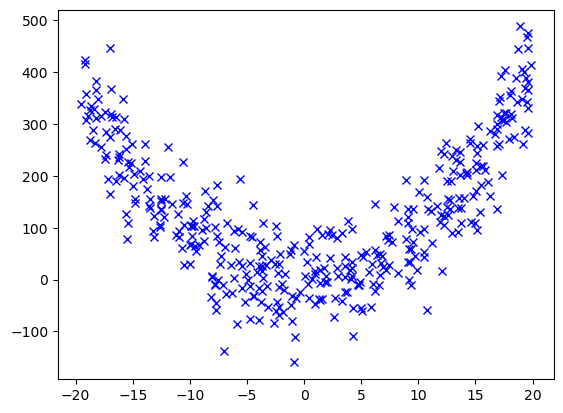

In [5]:
plt.plot(X, y, 'x', color='blue')

## Split The Data

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 1)
(80, 1)
(320, 1)
(80, 1)


## Linear Regression (OLS)

Train a OLS model and print the resulting line

In [7]:
from sklearn.linear_model import LinearRegression

ols_model = LinearRegression().fit(X_train, y_train)

In [8]:
print(ols_model.intercept_)
print(ols_model.coef_)

[129.66100253]
[[1.18494631]]


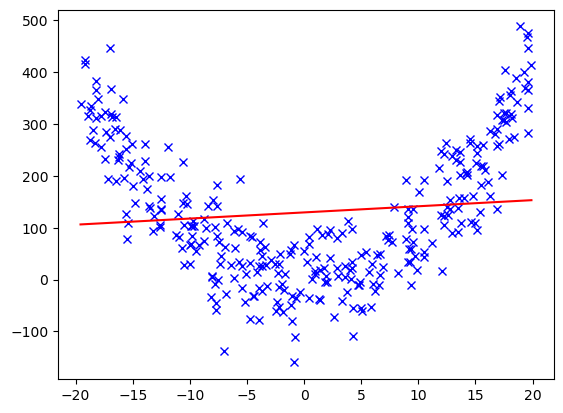

In [9]:
plot_regression_line(X_train, y_train, ols_model.predict(X_train))

In [10]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train, ols_model.predict(X_train)))

17121.721798104292


## Polynomial Regression

Train a quadratic model and print the resulting line

In [11]:
X_train_square = X_train ** 2

In [12]:
ols_model_square = LinearRegression().fit(X_train_square, y_train)

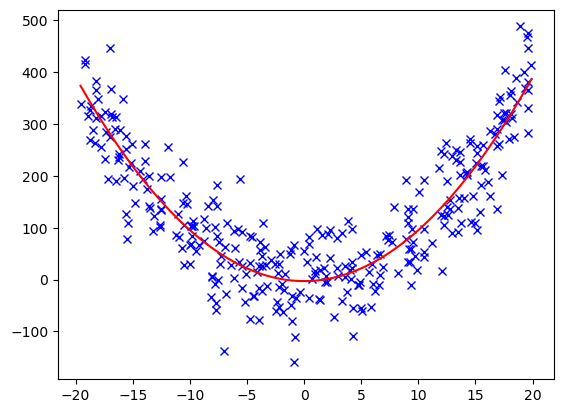

In [13]:
plot_regression_line(X_train, y_train, ols_model_square.predict(X_train_square))

In [14]:
print(mean_squared_error(y_train, ols_model_square.predict(X_train_square)))

3433.039487855041


## Polynomial Regression with degree=k

Use PolynomialFeatures to create a polynomial model with a high degree

In [24]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

poly_degree = 80

regression_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])


In [25]:
regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=80, include_bias=False)),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [26]:
print(regression_pipeline.named_steps["regressor"].intercept_)
print(regression_pipeline.named_steps["regressor"].coef_)

[130.28939248]
[[ 4.97392303e+02 -3.19958795e+03 -4.21617291e+04  4.44234776e+05
   1.62309437e+06 -2.26270089e+07 -3.13061232e+07  6.15618099e+08
   2.62885383e+08 -1.03940447e+10  7.36264997e+08  1.17842558e+11
  -4.16470546e+10 -9.38666711e+11  4.88033566e+11  5.38745163e+12
  -3.33721004e+12 -2.25022071e+13  1.52708160e+13  6.79789337e+13
  -4.84334587e+13 -1.44124480e+14  1.05038426e+14  1.97128990e+14
  -1.43642417e+14 -1.27763188e+14  8.77460405e+13 -5.77161475e+13
   5.44864288e+13  1.43397719e+14 -1.11087136e+14  8.14508532e+12
  -1.80654046e+13 -1.28331873e+14  1.06360709e+14 -1.89053799e+13
   2.62669194e+13  1.10954356e+14 -9.45268737e+13  5.64746869e+13
  -5.93132343e+13 -7.09659588e+13  6.22611131e+13 -9.38136764e+13
   9.26948489e+13  4.72626182e+12 -2.16942534e+12  8.98091195e+13
  -9.09780408e+13  6.43320823e+13 -6.74032442e+13 -3.08755444e+13
   3.80742009e+13 -8.65157969e+13  9.62788431e+13 -4.64332913e+13
   4.52713700e+13  3.95826798e+13 -5.79477514e+13  8.07609216

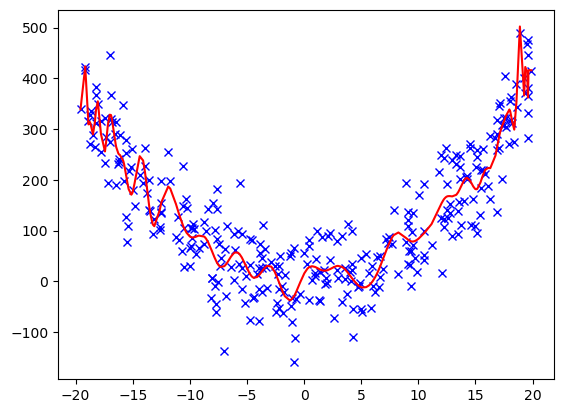

In [27]:
plot_regression_line(X_train, y_train, regression_pipeline.predict(X_train))

In [28]:
print(mean_squared_error(y_test, regression_pipeline.predict(X_test)))

4052.6076373583214


In [29]:
print(mean_squared_error(y_train, regression_pipeline.predict(X_train)))

2833.432115795039


In [34]:
print(mean_squared_error(y_test, ols_model_square.predict(X_test ** 2)))

3213.462650599329


In [36]:
print(mean_squared_error(y_train, ols_model_square.predict(X_train_square)))

3433.039487855041
